<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/crxdata.csv", header  = None)

In [3]:
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
            'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df_new  = df.replace('?', np.nan)

In [6]:
df_final =  df_new.dropna()

In [7]:
categorical = [var for var in df_new.columns if df_final[var].dtype == 'O']

In [8]:
categorical

['Gender',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'ApprovalStatus']

In [9]:
for i in range(len(categorical)):
  print(df_final[categorical[i]].value_counts())

b    450
a    203
Name: Gender, dtype: int64
22.67    9
18.83    6
25.00    6
19.17    6
20.67    6
        ..
38.17    1
48.25    1
28.33    1
18.50    1
36.42    1
Name: Age, Length: 340, dtype: int64
u    499
y    152
l      2
Name: Married, dtype: int64
g     499
p     152
gg      2
Name: BankCustomer, dtype: int64
c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: EducationLevel, dtype: int64
v     381
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
t    349
f    304
Name: PriorDefault, dtype: int64
f    366
t    287
Name: Employed, dtype: int64
f    351
t    302
Name: DriversLicense, dtype: int64
g    598
s     53
p      2
Name: Citizen, dtype: int64
00000    128
00120     35
00160     33
00200     33
00100     30
        ... 
00393      1
00395      1
00093      1
00204      1
00465      1
Name: ZipCode, Length: 164, dtype: 

In [10]:
df_final.head(1)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,+


In [ ]:
df_final['Gender'] = LabelEncoder().fit_transform(df_final['Gender'])
df_final['Married'] = LabelEncoder().fit_transform(df_final['Married'])
df_final['BankCustomer'] = LabelEncoder().fit_transform(df_final['BankCustomer'])
df_final['EducationLevel'] = LabelEncoder().fit_transform(df_final['EducationLevel'])
df_final['Ethnicity'] = LabelEncoder().fit_transform(df_final['Ethnicity'])
df_final['PriorDefault'] = LabelEncoder().fit_transform(df_final['PriorDefault'])
df_final['Employed'] = LabelEncoder().fit_transform(df_final['Employed'])
df_final['DriversLicense'] = LabelEncoder().fit_transform(df_final['DriversLicense'])
df_final['Citizen'] = LabelEncoder().fit_transform(df_final['Citizen'])
df_final['ApprovalStatus'] = LabelEncoder().fit_transform(df_final['ApprovalStatus'])

In [12]:
X = df_final.drop(['ApprovalStatus'], axis =1)
y =  df_final['ApprovalStatus']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chi2

In [14]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_

Text(0, 0.5, 'Features name')

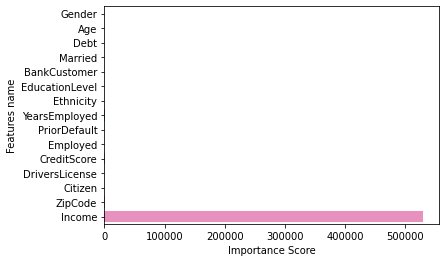

In [15]:
sns.barplot(x  = score,y = X.columns )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [16]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]],'score': np.sort(score)[::-1]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi.to_excel("credit_card_approval_dataset.xlsx",sheet_name='Chi_2')  

In [17]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [18]:
rf.feature_importances_

array([0.012, 0.074, 0.089, 0.016, 0.013, 0.054, 0.027, 0.107, 0.274,
       0.06 , 0.088, 0.014, 0.01 , 0.083, 0.08 ])

Text(0.5, 0, 'Feature Importance')

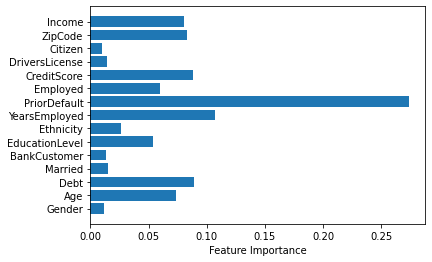

In [19]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [20]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]],'score': np.sort(rf.feature_importances_)[::-1]}
rank_tree = pd.DataFrame(data =  dc) 
from openpyxl import load_workbook
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

In [21]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [22]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

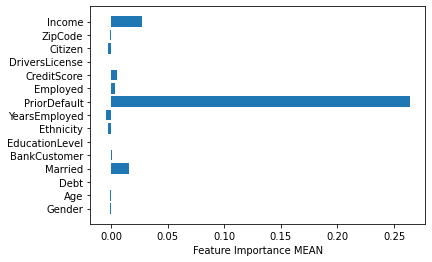

In [23]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [24]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]],'score': np.sort(result.importances_mean)[::-1]}
rank_per_mean = pd.DataFrame(data =  dc) 
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_mean.to_excel(writer, "permutation_method_mean")
writer.save()

Text(0.5, 0, 'Feature Importance STD')

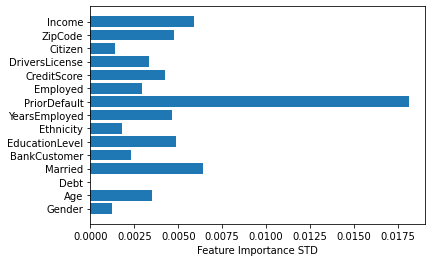

In [25]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [26]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]],'score': np.sort(result.importances_std)[::-1]}
rank_per_std = pd.DataFrame(data =  dc) 
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

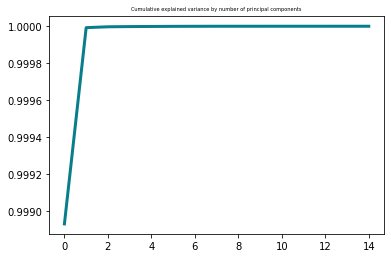

In [27]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [28]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Gender,0.020850,0.036329,0.027864,-0.013719,0.018361,-0.001491,0.042177,-0.021425,0.063571,0.106073,-0.115665,0.259058,-0.337557,-0.029316,0.000871
Age,-0.147735,-0.772376,11.437322,-0.905843,0.027519,0.030175,-0.228104,-0.093048,0.005855,-0.000300,0.000678,-0.000626,0.000814,-0.000971,0.000043
Debt,0.649189,-1.112190,1.122267,3.370970,-0.780904,-3.171898,-0.406608,-0.029483,0.011888,0.007368,-0.001048,0.000692,0.000974,-0.004149,-0.000044
Married,-0.052276,0.011311,-0.038248,-0.040668,0.035014,-0.002575,-0.002101,0.022769,0.416019,-0.018212,-0.001819,-0.020865,-0.006783,-0.003313,-0.058510
BankCustomer,0.001542,0.027284,-0.088096,-0.081244,0.073168,-0.015002,0.011573,0.054301,0.831309,-0.009074,-0.000619,-0.045215,0.005994,-0.010912,0.029272


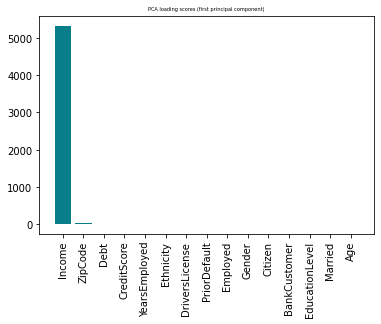

In [29]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

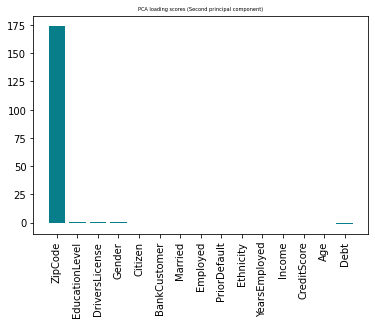

In [ ]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (Second principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 8,  9, 10,  7,  2,  3,  4, 14,  1,  5, 12, 13, 11,  0,  6])

In [32]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['PriorDefault', 'Employed', 'CreditScore', 'YearsEmployed', 'Debt',
       'Married', 'BankCustomer', 'Income', 'Age', 'EducationLevel',
       'Citizen', 'ZipCode', 'DriversLicense', 'Gender', 'Ethnicity'],
      dtype=object)

In [33]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([5.777e+02, 1.294e+02, 8.626e+01, 6.110e+01, 2.870e+01, 1.769e+01,
       1.533e+01, 1.351e+01, 1.109e+01, 6.236e+00, 5.218e+00, 3.523e+00,
       1.582e+00, 1.230e-01, 8.595e-02])

Text(0, 0.5, 'Features')

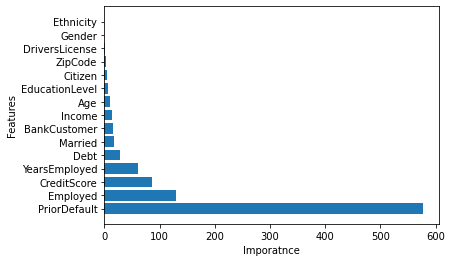

In [34]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [35]:
dc = {'Score': feature_importances_fscore , 'Name': best_features_fscore }
rank_f_test = pd.DataFrame(dc) 
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [36]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['PriorDefault', 'CreditScore', 'Employed', 'Income',
       'YearsEmployed', 'EducationLevel', 'Debt', 'Married', 'Ethnicity',
       'BankCustomer', 'Gender', 'Age', 'ZipCode', 'Citizen',
       'DriversLicense'], dtype=object)

In [37]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.329, 0.127, 0.101, 0.092, 0.065, 0.052, 0.035, 0.028, 0.025,
       0.009, 0.009, 0.004, 0.   , 0.   , 0.   ])

Text(0, 0.5, 'Features')

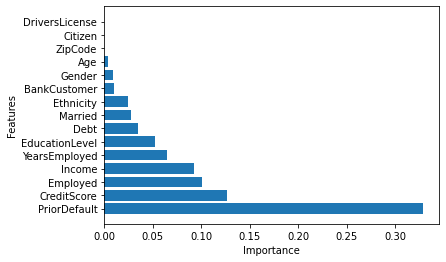

In [38]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [39]:
dc = {'Score':feature_importances_mutual_info, 'Name':best_features_mutual_info }
rank_mutual = pd.DataFrame(dc)
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [40]:
df_corr = df_final.corr()

In [41]:
corr_rank = pd.DataFrame(df_corr['ApprovalStatus'])
corr_rank = corr_rank.sort_values(by = 'ApprovalStatus',ascending = False)
corr_rank

,ApprovalStatus
ApprovalStatus,1.000000
Married,0.179700
BankCustomer,0.169976
Citizen,0.100785
Gender,0.019817
Ethnicity,0.011023
DriversLicense,-0.050011
EducationLevel,-0.123314
Income,-0.172766
Debt,-0.207086


In [ ]:
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
index = selector.ranking_.argsort()
X.columns[index]

Index(['PriorDefault', 'ZipCode', 'Debt', 'Income', 'YearsEmployed',
       'EducationLevel', 'Employed', 'Age', 'Ethnicity', 'Married', 'Gender',
       'DriversLicense', 'BankCustomer', 'CreditScore', 'Citizen'],
      dtype='object')

In [ ]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
book = load_workbook('/content/credit_card_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()